In [1]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sympy import symbols, diff, lambdify
from scipy.optimize import minimize

#Py files
import multijoueurs_Q as multiQ

In [10]:
import numpy as np
 # Changer le nombre de joueurs ici

aggregated_agents = []
for nb_players in [2, 3, 4, 5]:
    total_rewards = []

    for loop in range(3):
        print("Loop:", loop)
        agents = [multiQ.Agent(nb_player=nb_players) for _ in range(nb_players)]
        env = multiQ.Env(nb_players=nb_players)

        temps = []
        rewards = []
        epsilon = []
        prices = []

        # Initialisation des prix p0 (on va le faire directement dans chaque agent)
        for agent in agents:
            agent.p = np.random.choice(agent.A)

        # Initialisation de l'état
        s_t = env([agent.p for agent in agents])[1]
        for agent in agents:
            agent.s_t = s_t

        s_ind = agents[0].find_index(agents[0].S, agents[0].s_t)
        for agent in agents:
            agent.s_ind = s_ind

        # Phase itérative
        for t in range(3):
            # Actions et état t+1
            for agent in agents:
                agent.a_ind = agent.get_next_action()

            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            for agent in agents:
                agent.s_t1 = s_t1

            s_ind1 = agents[0].find_index(agents[0].S, agents[0].s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1

            temps.append(t)
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            epsilon_values = [agent.epsilon for agent in agents]
            epsilon.append(epsilon_values)
            prices.append([agent.p for agent in agents])

            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)

        total_rewards.append(rewards)

    aggregated_agents.append(np.array(total_rewards).mean(axis=0))

Loop: 0
Loop: 1
Loop: 2
Loop: 0
Loop: 1
Loop: 2
Loop: 0
Loop: 1
Loop: 2
Loop: 0
Loop: 1
Loop: 2


IndexError: index 1 is out of bounds for axis 0 with size 1

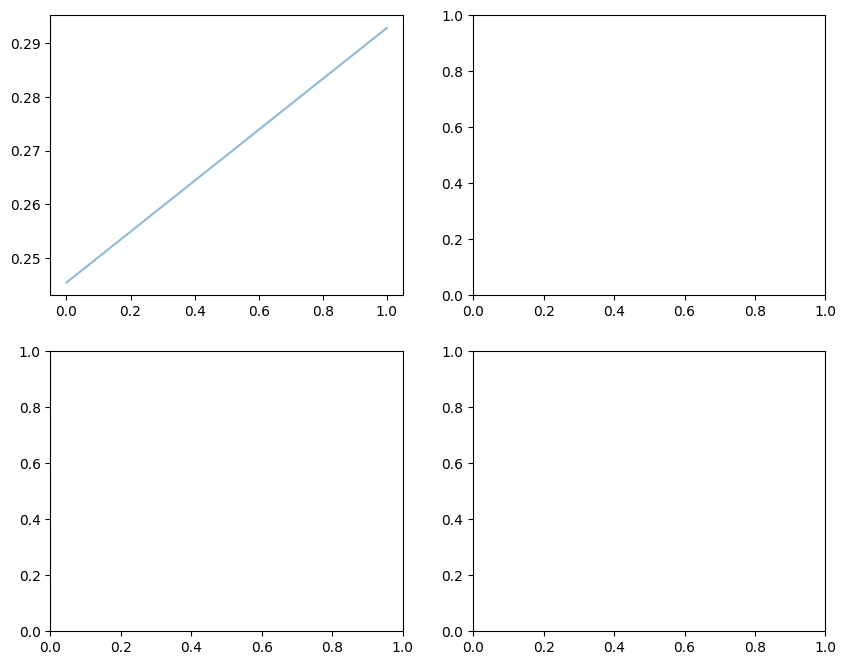

In [9]:
# Créer une figure et des sous-graphiques (2 lignes, 2 colonnes)
num_players = 5
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Liste des noms de joueurs pour la légende
player_labels = [f'Player {i+1}' for i in range(num_players)]

# Boucle pour itérer à travers les sous-graphiques
for i, ax in enumerate(axes.flat):
    # Tracer les courbes pour chaque joueur dans le sous-graphique
    for player in range(num_players):
        ax.plot(aggregated_agents[i][player], alpha=0.5, label=player_labels[player])
    
    # Titre du sous-graphique avec le numéro de sous-graphique
    ax.set_title(f'Subplot {i+1}')
    
    # Nommer les axes du sous-graphique
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Reward (3-sample average)')

# Ajouter une légende commune pour tous les sous-graphiques
lines, labels = ax.get_legend_handles_labels()
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(1, 0.15))

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()